# <center>Theoretical Part </center>

### Model Settings
From https://alisdairmckay.com/Notes/HetAgents/RBC

- Preferences: $$\mathbb{E}_0\sum_{t=0}^\infty \beta^t \frac{C_t^{1-\gamma}}{1-\gamma}$$
- Technologies: $$Y_t = Z_t K_{t-1}^{\alpha}\bar{L}^{1-\alpha} $$
- Capital Evolution: $$K_t = (1-\delta)K_{t-1}+Y_t-C_t$$
- Productivity: $$\log Z_t = \rho \log Z_{t-1}+\epsilon_t$$

### Equilibrium
- Euler Equation: $$C_t^{-\gamma} =  \beta \mathbb{E}_t [R_{t+1}C_{t+1}^{-\gamma}] $$
- F.O.C: $$R_t = \alpha Z_t (K_{t-1}/\bar{L})^{\alpha-1}+1-\delta$$ 
- Capital Law of Motion: $$K_t=(1-\delta)K_{t-1}+Y_t-C_t$$
- Production Function: $$Y_t = Z_t K_{t-1}^\alpha \bar{L}^{1-\alpha}$$
- Productivity Shock: $$\log Z_t = \rho \log Z_{t-1}+\epsilon_t$$

### Steady-State Values
$$\begin{align} Z &= 1 \\ Y &= K^\alpha \\ R &= 1/\beta \\ C&= Y-\delta K \\ K & = \left(\frac{R-1+\delta}{\alpha} \right)^{1/(\alpha-1)}   \end{align}$$

### Algebric Equation:
$$\begin{align} \mathbb{E}_t(r_{t+1}-\gamma(c_{t+1}-c_t))&=0 \\ r_t &= (1-\beta +\beta\delta)(z_t+(\alpha-1)k_t) \\  c_t &=  \frac{{Y}}{{C}}z_t + \frac{{K}}{{C}}{R}k_{t-1} - \frac{{K}}{{C}}k_t \\  y_t &= z_t + \alpha k_{t-1}  \\ z_t & = \rho z_{t-1} + \epsilon_t    \end{align}$$

# <center> Perturbation </center>

In [1]:
import numpy as np
import scipy as sp
import sympy
import matplotlib.pyplot as plt

In [2]:
## Initialization:
# Parameters
alpha = 0.40
beta  = 0.98
gamma = 2.00
delta = 0.02
rho   = 0.95

# Index
nX = 5
iZ, iR, iK, iY, iC = range(nX)

# SS
eps_SS = 0

In [3]:
## Steady-State Values
def SS():
    
    """
     Solve the Steady-state equilibrium using Python symbolic package
     Sympy
    """
    
    sZ, sR, sK, sY, sC = sympy.symbols('sZ, sR, sK, sY, sC')

    Eq_Euler = sympy.Eq(beta * sR ,1)
    Eq_FOC   = sympy.Eq(alpha * sZ * sK**(alpha-1) + 1 - delta - sR,0)
    Eq_LMK   = sympy.Eq(sY - delta*sK - sC,0)
    Eq_Pro   = sympy.Eq(sZ * sK**alpha - sY,0)
    Eq_Z     = sympy.Eq(sympy.log(sZ) * (rho-1) + eps_SS,0)
    
    solution = sympy.solve(Eq_Z, sZ)
    Z = solution[0]
    
    solution = sympy.solve((Eq_Euler),(sR))
    R = solution[0]
    
    solution = sympy.solve((Eq_FOC.subs({sZ:Z, sR:R}), Eq_LMK, Eq_Pro.subs({sZ:Z})),(sY, sK, sC))
    Y, K, C = solution[0]
    
    X = np.zeros(nX)
    X[[iZ, iR, iK, iY, iC]] = (Z, R, K, Y, C)
    
    return Z, R, K, Y, C, X
    

In [4]:
Z, R, K, Y, C, X = SS()
print('Z =',Z,'\nR =',R,'\nK =',K,'\nY =',Y,'\nC =',C,'\nX =',X)

Z = 1.00000000000000 
R = 1.02040816326531 
K = 45.6371100551637 
Y = 4.61027948516450 
C = 3.69753728406123 
X = [ 1.          1.02040816 45.63711006  4.61027949  3.69753728]


### Uhlig (2009) Algorithm
##### Approach I: k is the only state variable
1. Write into canonical Form:
$\tilde{x}_t$ is endogenous state variables, $\tilde{y}_t$ is endogenous other variables, $\tilde{z}_t$ is exogenous shocks, all formula below is in Matrix Formm
$$\begin{cases} 0 = A\tilde{x}_t + B\tilde{x}_{t-1}+C\tilde{y}_t+D\tilde{z}_t \\  0 = E_t[F\tilde{x}_{t+1}+G\tilde{x}_t+H\tilde{x}_{t-1} + J\tilde{y}_{t+1}+ K \tilde{y}_t + L\tilde{z}_{t+1}+M\tilde{z}_t]   \\  \tilde{z}_{t+1}  = N\tilde{z}_t +\epsilon_{t+1};\quad E_t[\epsilon_{t+1}]=0 \end{cases}\tag{3}$$

Here:
$$A=\begin{bmatrix}(1-\beta+\beta\delta)(\alpha-1) \\ -K/C \\ 0 \end{bmatrix} \quad B=\begin{bmatrix}0 \\ K/(\beta C) \\ \alpha \end{bmatrix} \quad  C=\begin{bmatrix}0 & -1 & 0 \\ -1 & 0 & 0 \\ 0 & 0 & -1 \end{bmatrix} \quad D=\begin{bmatrix}(1-\beta+\beta\delta) \\ Y/C \\ 1 \end{bmatrix}$$

$$F = 0 \quad G = 0 \quad H = 0 \quad J = \begin{bmatrix}-\gamma & 1 & 0\end{bmatrix}\quad K = \begin{bmatrix}\gamma & 0 & 0\end{bmatrix}\quad L = 0\quad M = 0$$
$$ N = \rho$$

In [5]:
F = G = H = L = M = np.zeros((1,1),dtype=float)
F, G, H, L, M

(array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]))

In [6]:
A = np.zeros((3,1),dtype=float)
A[0] = (1-beta+beta*delta)*(alpha-1)
A[1] = -K/C
A

array([[ -0.02376   ],
       [-12.34256927],
       [  0.        ]])

In [7]:
B = np.zeros((3,1),dtype=float)
B[1] = K/(beta * C)
B[2] = alpha
B

array([[ 0.        ],
       [12.59445844],
       [ 0.4       ]])

In [8]:
CM = np.zeros((3,3),dtype=float)
CM[0,1]=CM[1,0]=CM[2,2]=-1
CM

array([[ 0., -1.,  0.],
       [-1.,  0.,  0.],
       [ 0.,  0., -1.]])

In [9]:
D = np.zeros((3,1))
D[0] = 1-beta+beta*delta
D[1] = Y/C
D[2] = 1
D

array([[0.0396    ],
       [1.24685139],
       [1.        ]])

In [10]:
J = np.zeros((1,3),dtype=float)
J[0,0] = -gamma
J[0,1] = 1
J

array([[-2.,  1.,  0.]])

In [11]:
KM = np.zeros((1,3),dtype=float)
KM[0,0] = gamma
KM

array([[2., 0., 0.]])

In [12]:
N = rho * np.ones((1,1),dtype=float)
N

array([[0.95]])

2. Construct the Quadratic Equation
Assume that $$\begin{cases} x_t = Px_{t-1}+Qz_t \\ y_t = Rx_{t-1} + Sz_t \end{cases} \tag{4}$$

Then we have
$$\Psi P^2 -\Gamma P - \Theta = 0$$

Here
$$\Psi = \begin{bmatrix} 0 \\ F-JC^+A \end{bmatrix}\quad \Gamma = \begin{bmatrix} C^0A \\ JC^+B-G+KC^+A \end{bmatrix}\quad \Theta = \begin{bmatrix} C^0B \\ KC^+B -H \end{bmatrix}$$

In [13]:
Cplus = np.linalg.inv(CM.T@CM)@CM.T
Cplus

# since C is inversable $l\times l$ matrix, $C^0$ disappear and the first n rows in illustration above disappear.
# In Corollary 1 in Uhlig (1999) 

array([[ 0., -1.,  0.],
       [-1.,  0.,  0.],
       [ 0.,  0., -1.]])

In [14]:
Psi = F - J@Cplus@A
Psi

array([[24.66137854]])

In [15]:
Gamma =  J@Cplus@B - G + KM@Cplus@A
Gamma

array([[49.87405542]])

In [16]:
Theta = KM@Cplus@B - H
Theta

array([[-25.18891688]])



3. Solve the quadratic problem to get $P$

> If there is a recursive equilibrium law of motion solving equations (4) then the following must be true
> $P$ satisfies the (matrix) quadratic equation $$ \Psi P^2 - \Gamma P - \Theta = 0$$
> The equilibrium described by the recursive equilibrium law of motion is stable iff  all eigenvalues of $P$ are smaller than unity in absolute value
> 
> To solve $P$, define the $2m\times 2m$ matrices $\Xi$ and $\Delta$ via $$\Xi = \begin{bmatrix} \Gamma & \Theta \\ I_m & 0_{m\times m}\end{bmatrix}$$ 
> and $$\Delta = \begin{bmatrix} \Psi &  0_{m\times m} \\ 0_{m\times m} & I_m\end{bmatrix}$$
> $s$ and $\lambda$ are generalized eigenvectors and eigenvalues
> 1. $s$ can be written as $$ s = \begin{bmatrix} \lambda x \\ x \end{bmatrix}$$
> 2. If there are m generalized eigenvalues $\lambda_1, \lambda_2, \cdots, \lambda_m$ and corresponding m generalized eigenvectors $s_1, s_2, \cdots, s_m$, written as $s_i' = [\lambda_i x_i',x_i']$ for some $x_i \in \mathbb{R}^m$, and if $(x_1,x_2,\cdots,x_m)$ is linearly independent, then \begin{align}P = \overbrace{\Omega}^{\large \Omega = [x_1,x_2,\cdots,x_m]} \underbrace{\Lambda}_{\large\Lambda= [\lambda,\lambda_2,\cdots, \lambda_m]} \Omega^{-1} \end{align}

3.1 **Use Generalized Eigenvector Routine, calculate eigenvalues directly**

In [17]:
# P is 1 by 1 matrix, so a normal quadratic solver is enough.
# Here, to check the generalized eigenvector approach,
# I still follow the way in Uhlig (1999)

Xi = np.hstack((Gamma, Theta))
Temp = np.array((1,0))
Xi = np.vstack((Xi, Temp))
Xi

array([[ 49.87405542, -25.18891688],
       [  1.        ,   0.        ]])

In [18]:
Temp = np.ones((1,1))
Delta = np.hstack((Psi, Temp))
Temp = np.hstack((0,1))
Delta = np.vstack((Delta, Temp))
Delta

array([[24.66137854,  1.        ],
       [ 0.        ,  1.        ]])

In [19]:
lambdaP, sP = np.linalg.eig(np.linalg.inv(Delta)@Xi)
lambdaP, sP

(array([0.99090275+0.19875368j, 0.99090275-0.19875368j]),
 array([[0.7108384 +0.j        , 0.7108384 -0.j        ],
        [0.68961987-0.13832284j, 0.68961987+0.13832284j]]))

In [20]:
lambdaP1 = lambdaP[0]
xP = sP[1,0]
lambdaP1, xP

((0.9909027457293565+0.19875367619994672j),
 (0.6896198702633299-0.13832284246470672j))

In [21]:
P = xP.T*lambdaP1.T/xP.T
P

(0.9909027457293565+0.19875367619994672j)

<font color = #f33> Unfortunately, the matrix $P$ is complex, as mentioned in Uhlig 1999, enlarging the state-variable space is necessary, see below, approach II</font>

3.2 **Solve scale quadratic equation directly**

In [22]:
# Double Check
P1 = (Gamma - np.sqrt(Gamma**2+4*Psi*Theta))/(2*Psi)
P2 = (Gamma + np.sqrt(Gamma**2+4*Psi*Theta))/(2*Psi)
P1, P2

(array([[0.97818671]]), array([[1.04416802]]))

4. Solve the remaining coefficient matrice $R$, $Q$, and $S$
> Given $P$, $R$ is given by $$R = -C^+ (AP+B)$$
> 
> Given $P$ and $R$, $Q$ and $S$ are given by: $$\begin{align} &V \begin{bmatrix} vec(Q) \\ vec{(S)} \end{bmatrix} = - \begin{bmatrix}vec(D) \\ vec(LN+M) \end{bmatrix} \\ &\downarrow \\ V = & \begin{bmatrix}I_k \otimes A & I_k \otimes C \\ N'\otimes F + I_k \otimes (FP+JR+G) & N'\otimes J+I_k\otimes K \end{bmatrix}  \end{align}$$


 


In [23]:
R = -Cplus @ (B + A@P1)
R

array([[ 0.52112122],
       [-0.02324172],
       [ 0.4       ]])

In [24]:
I = np.eye(1,dtype = float)
V1 = np.hstack((np.kron(I,A),np.kron(I,CM)))
V2 = np.hstack(((np.kron(N,F)+np.kron(I,(F*P1+J@R+G))),
                (np.kron(N,J)+np.kron(I,KM))))
V = np.vstack((V1, V2))
V

array([[ -0.02376   ,   0.        ,  -1.        ,   0.        ],
       [-12.34256927,  -1.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,  -1.        ],
       [ -1.06548417,   0.1       ,   0.95      ,   0.        ]])

In [25]:
vec_QS = -np.linalg.inv(V) @ np.vstack((D,L@N+M)) # D and LN+M itself is a column vector here
vec_QS

array([[0.06988943],
       [0.38423625],
       [0.03793943],
       [1.        ]])

In [26]:
Q = vec_QS[0]
S = vec_QS[1:]
Q,S

(array([0.06988943]),
 array([[0.38423625],
        [0.03793943],
        [1.        ]]))

### Impluse Response

$$\begin{align}\begin{bmatrix} x_t \\ y_t \\ z_t \end{bmatrix} &= \begin{bmatrix} P & \mathbf{0} & 0 \\ R & \mathbf{0} & 0 \\ \mathbf{0} & \mathbf{0} & N \end{bmatrix}\begin{bmatrix}x_{t-1} \\ y_{t-1}\\ z_{t-1}\end{bmatrix}+ \begin{bmatrix} Q \\ S \\ 0 \end{bmatrix}z_t \\ & = \begin{bmatrix} P & \mathbf{0} & 0 \\ R & \mathbf{0} & 0 \\ \mathbf{0} & \mathbf{0} & N \end{bmatrix}\begin{bmatrix}x_{t-1} \\ y_{t-1}\\ z_{t-1}\end{bmatrix}+ \begin{bmatrix}0 &  \mathbf{0} & Q \\ 0 & \mathbf{0} & S \\ 0 & \mathbf{0} & 0 \end{bmatrix}\begin{bmatrix} x_t \\ y_t \\ z_t \end{bmatrix}\end{align}$$

In [27]:
num_periods = 80  # Number of periods for the IRF

# Initialize the impulse response
irf = np.zeros((5,num_periods))

# Set the initial impulse
irf[0:5,0:1] = np.vstack((Q,S,np.ones((1,1))))*0.01

# Set the coefficient matrice CI0
CI0_1 = np.hstack((P1,np.zeros((1,4))))
CI0_2 = np.hstack((R,np.zeros((3,4))))
CI0_3 = np.hstack((np.zeros(((1,4))),N))
CI0 = np.vstack((CI0_1, CI0_2, CI0_3))
CI0

array([[ 0.97818671,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.52112122,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.02324172,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.4       ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.95      ]])

In [28]:
# Set the coefficient matrice CI1
CI1 = np.vstack((Q,S,np.zeros((1,1))))
CI1 = np.hstack((np.zeros((5,4)),CI1))
CI1

array([[0.        , 0.        , 0.        , 0.        , 0.06988943],
       [0.        , 0.        , 0.        , 0.        , 0.38423625],
       [0.        , 0.        , 0.        , 0.        , 0.03793943],
       [0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

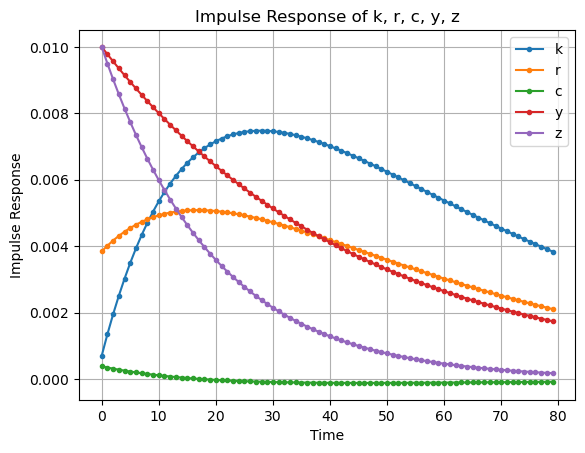

In [29]:
# Calculate the impulse response function
for t in range(1, num_periods):
    irf[:,t:t+1] = np.linalg.inv(np.eye((5))-CI1) @ CI0 @ irf[:,t-1:t] 

# Plot the impulse response function
plt.plot(range(num_periods), irf[0,:], marker='.')
plt.plot(range(num_periods), irf[1,:], marker='.')
plt.plot(range(num_periods), irf[2,:], marker='.')
plt.plot(range(num_periods), irf[3,:], marker='.')
plt.plot(range(num_periods), irf[4,:], marker='.')
plt.xlabel("Time")
plt.ylabel("Impulse Response")
plt.title("Impulse Response of k, r, c, y, z")
plt.legend(('k','r','c','y','z'))
plt.grid()
plt.show()